<a href="https://colab.research.google.com/github/sherlapuspa/Waste-VolumePrediction-using-Backpropagation-Artificial-Neural-Network/blob/main/PREDIKSI_VOLUME_SAMPAH_DENGAN_METODE_BACKPROPAGATION_ARTIFICIAL_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [ ]:
#import Library Numpy, Pandas
import pandas as pd
import numpy as np

#Library Tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# import library plotly,itertools
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from itertools import cycle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving boralasgamuwa_2012-2018.csv to boralasgamuwa_2012-2018 (1).csv


In [ ]:
import pandas as pd

data = pd.read_csv('boralasgamuwa_2012-2018.csv')

# Menampilkan 5 baris pertama
print("5 baris pertama:")
print(data.head())

# Menampilkan 5 baris terakhir
print("\n5 baris terakhir:")
print(data.tail())

5 baris pertama:
               area ticket_date waste_type  net_weight_kg
0  Boralesgamuwa UC  2012-01-01        MSW        17340.0
1  Boralesgamuwa UC  2012-01-02        MSW        25980.0
2  Boralesgamuwa UC  2012-01-03        MSW        29220.0
3  Boralesgamuwa UC  2012-01-04        MSW         7450.0
4  Boralesgamuwa UC  2012-01-05        MSW        10520.0

5 baris terakhir:
                  area ticket_date            waste_type  net_weight_kg
2983  Boralesgamuwa UC  2018-12-29                   MSW        24390.0
2984  Boralesgamuwa UC  2018-12-29  Sorted Organic Waste         1990.0
2985  Boralesgamuwa UC  2018-12-30                   MSW        18960.0
2986  Boralesgamuwa UC  2018-12-31                   MSW        40420.0
2987  Boralesgamuwa UC  2018-12-31  Sorted Organic Waste         8150.0


In [ ]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

###Struktur Data

In [ ]:
deskripsi = data.describe()
print(deskripsi)

       net_weight_kg
count    2988.000000
mean    22159.832664
std     12825.464915
min         0.000000
25%     12767.500000
50%     23905.000000
75%     30682.500000
max    215040.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           2988 non-null   object 
 1   ticket_date    2988 non-null   object 
 2   waste_type     2988 non-null   object 
 3   net_weight_kg  2988 non-null   float64
dtypes: float64(1), object(3)
memory usage: 93.5+ KB


In [ ]:
data.dtypes

area              object
ticket_date       object
waste_type        object
net_weight_kg    float64
dtype: object

In [ ]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum()})
missing_data

,total_missing
area,0
ticket_date,0
waste_type,0
net_weight_kg,0


#OUTLIER

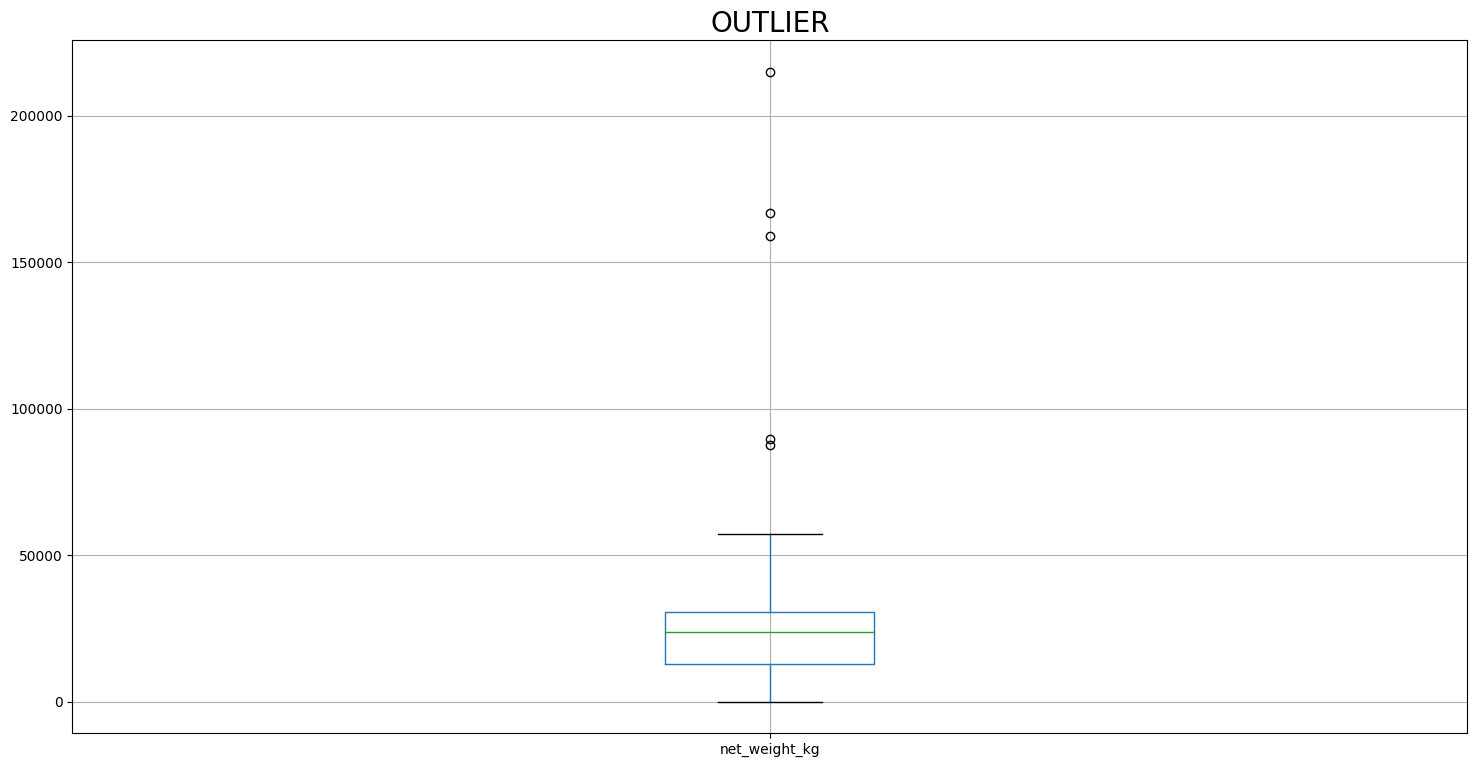

In [ ]:
num_cols = ['net_weight_kg']
plt.figure(figsize=(18,9))
data[num_cols].boxplot()
plt.title("OUTLIER", fontsize=20)
plt.show()

##Grafik Net Weight

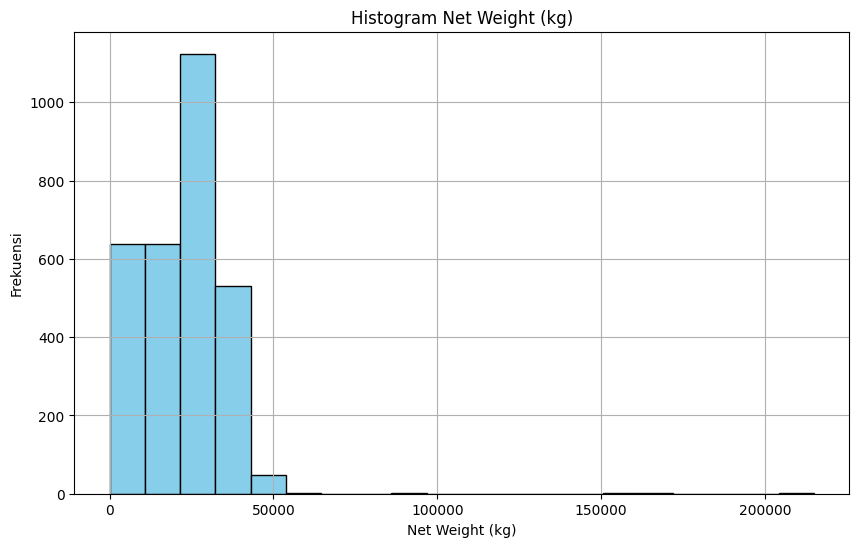

In [ ]:
net_weight = data['net_weight_kg']

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(net_weight, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Net Weight (kg)')
plt.ylabel('Frekuensi')
plt.title('Histogram Net Weight (kg)')
plt.grid(True)
plt.show()

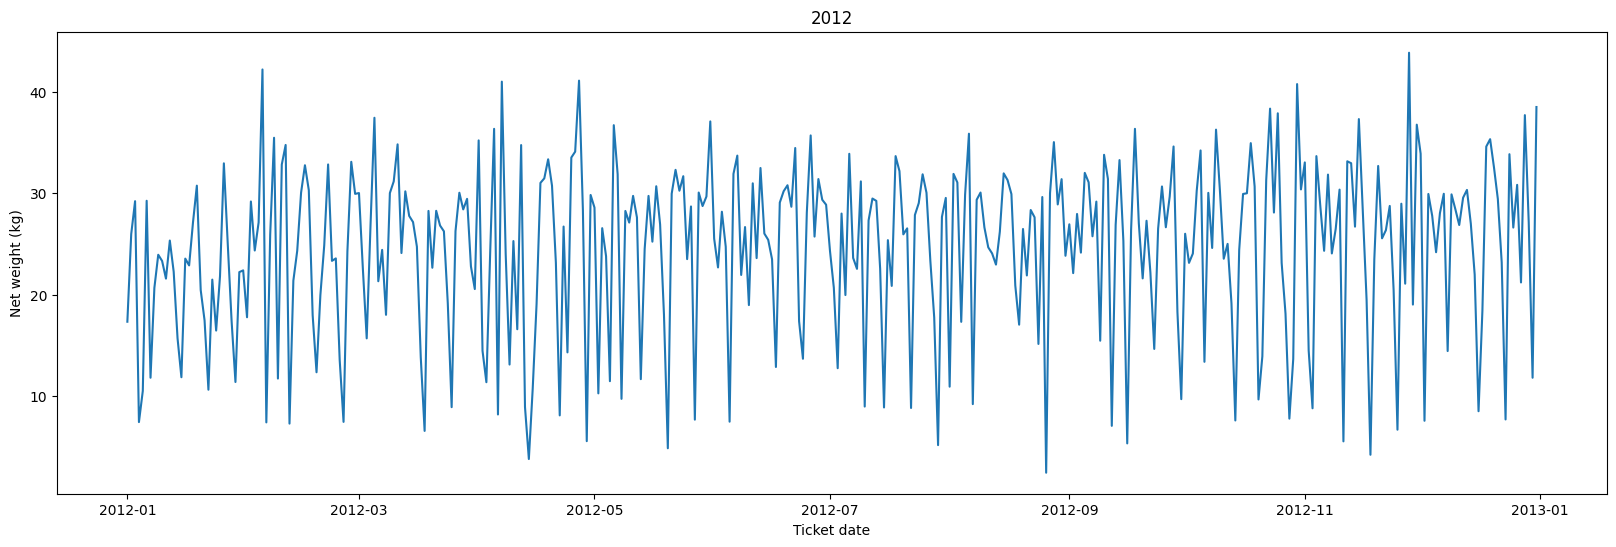

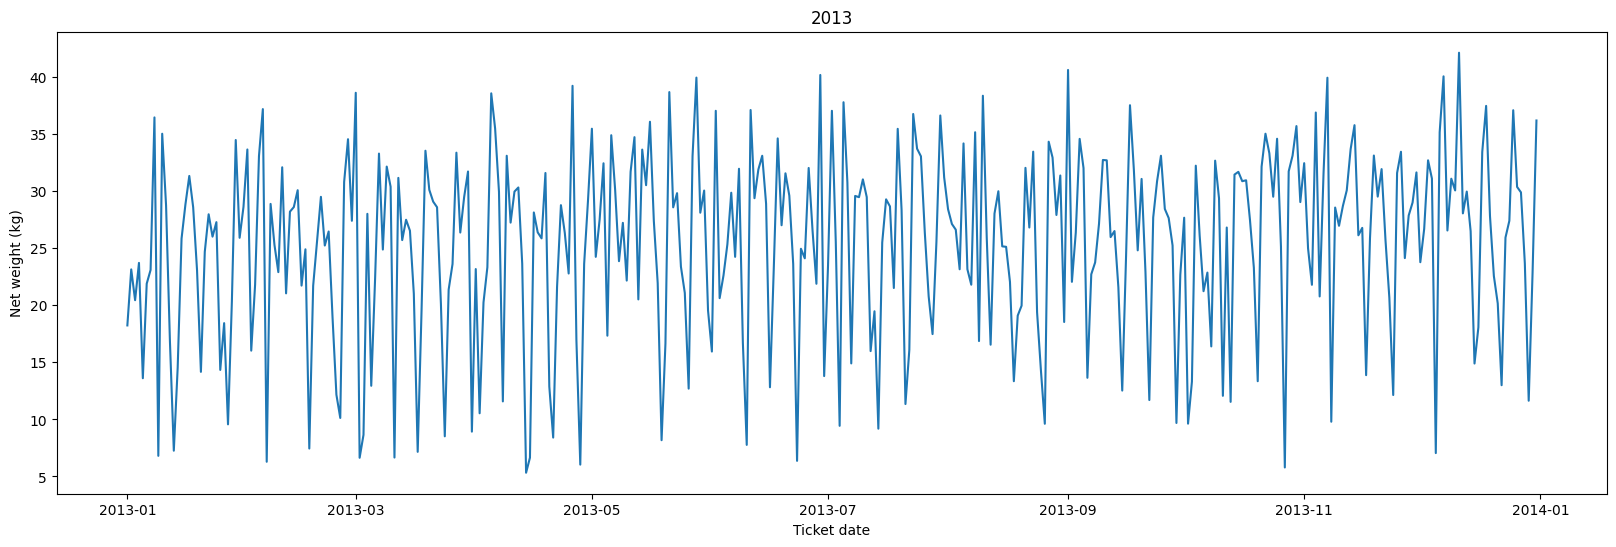

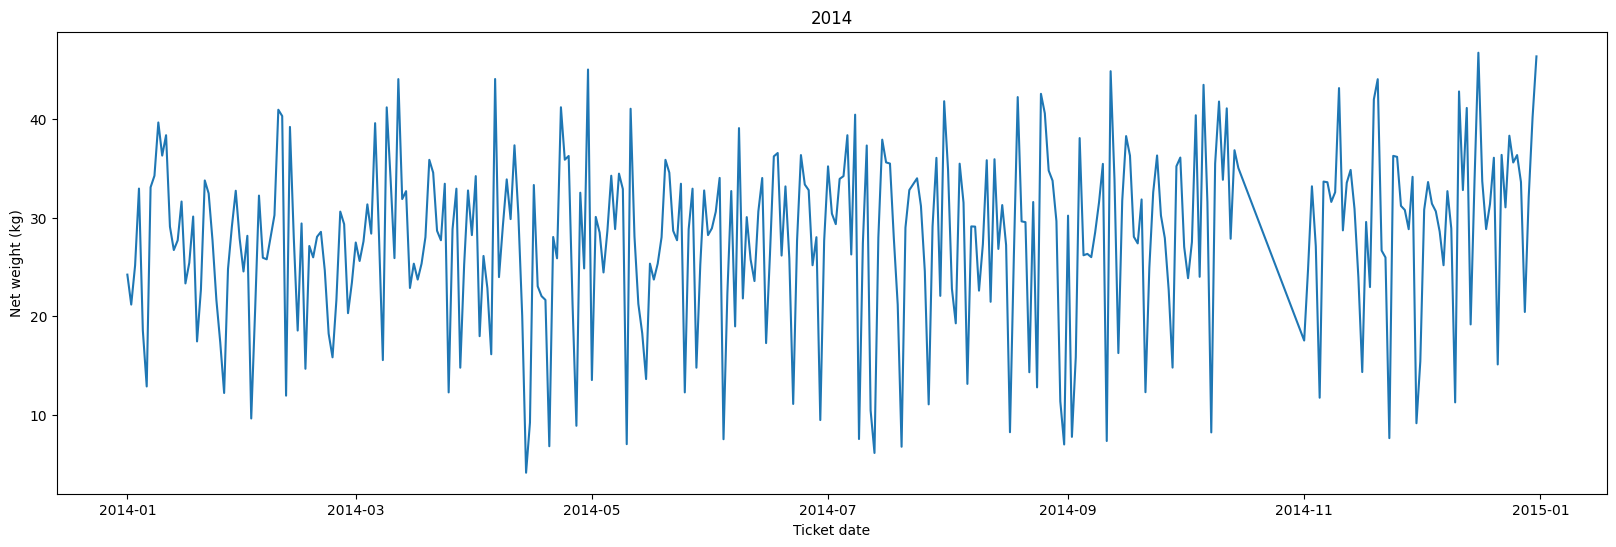

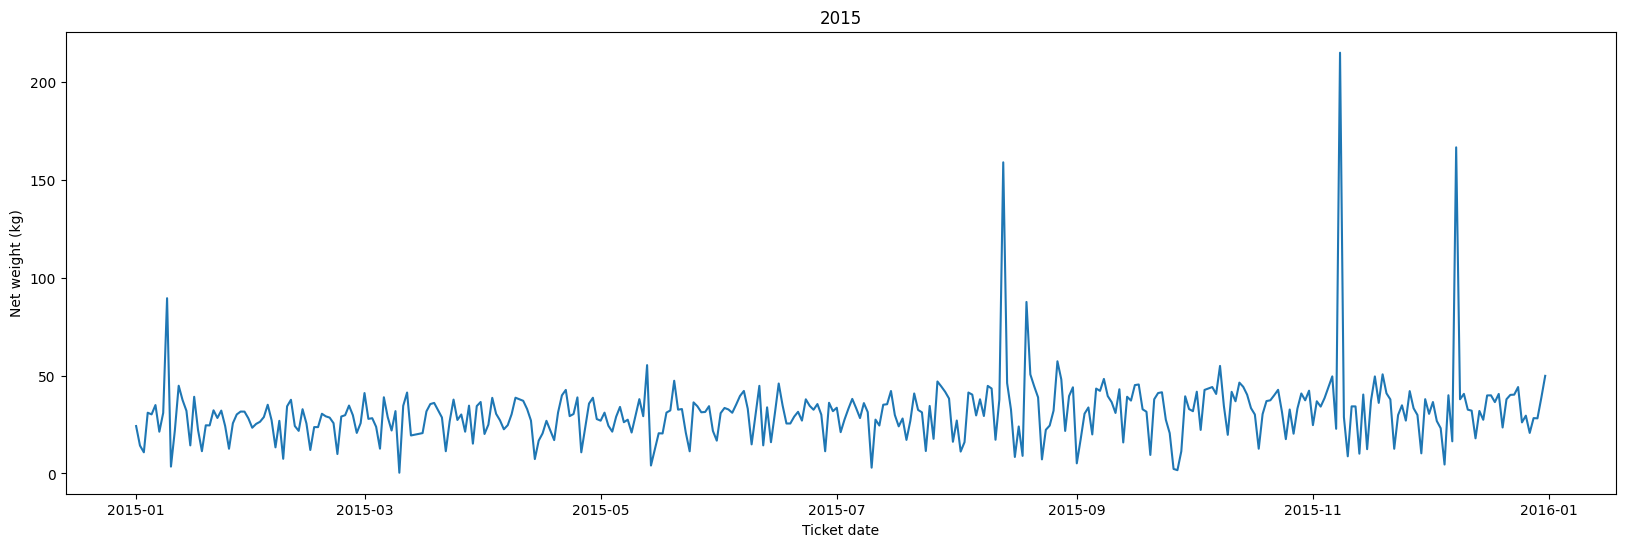

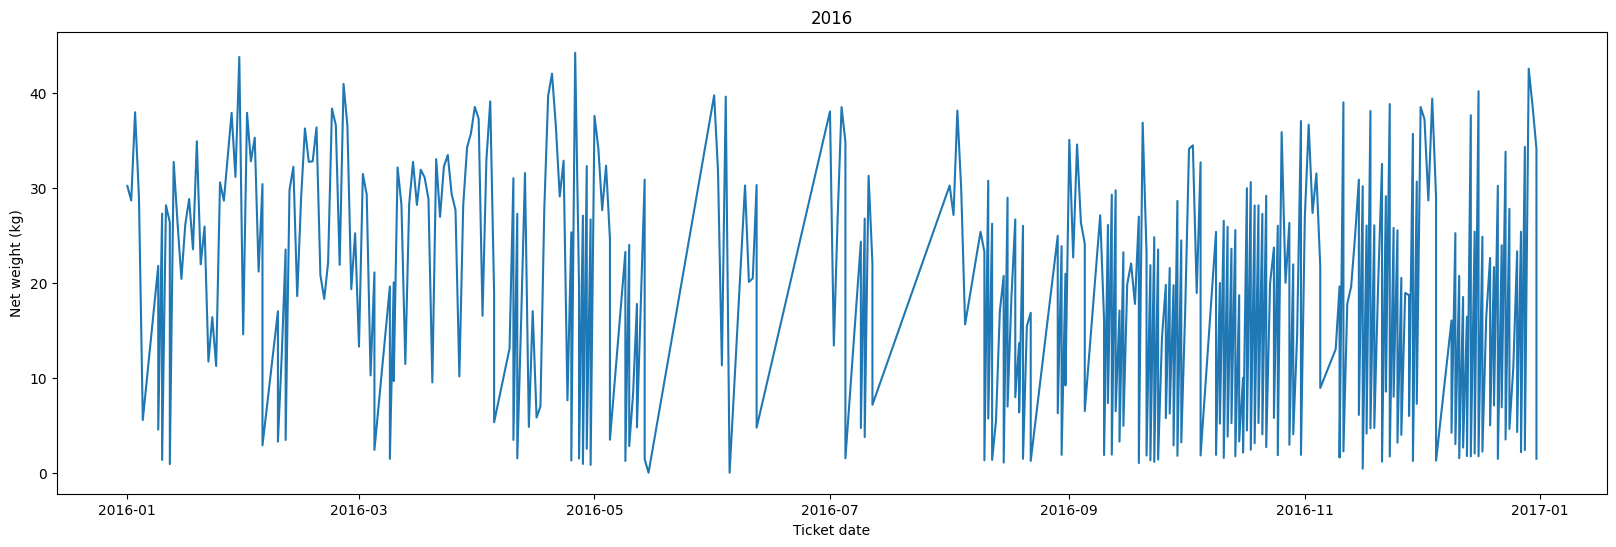

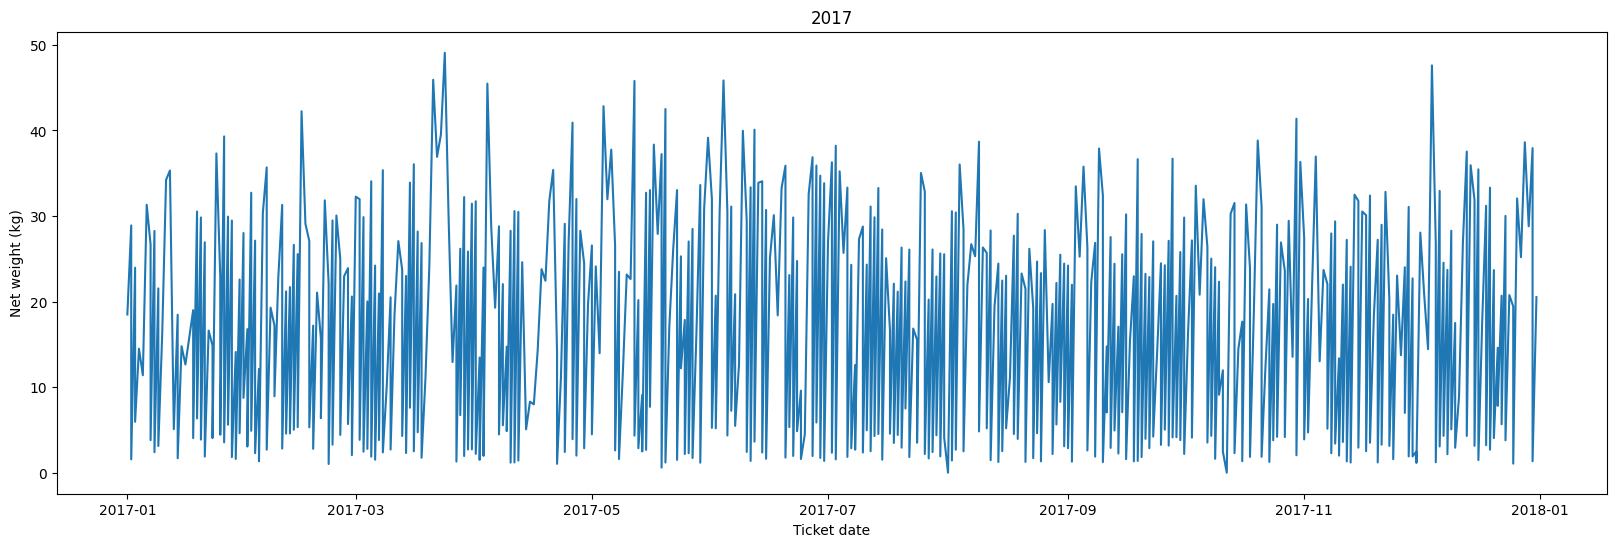

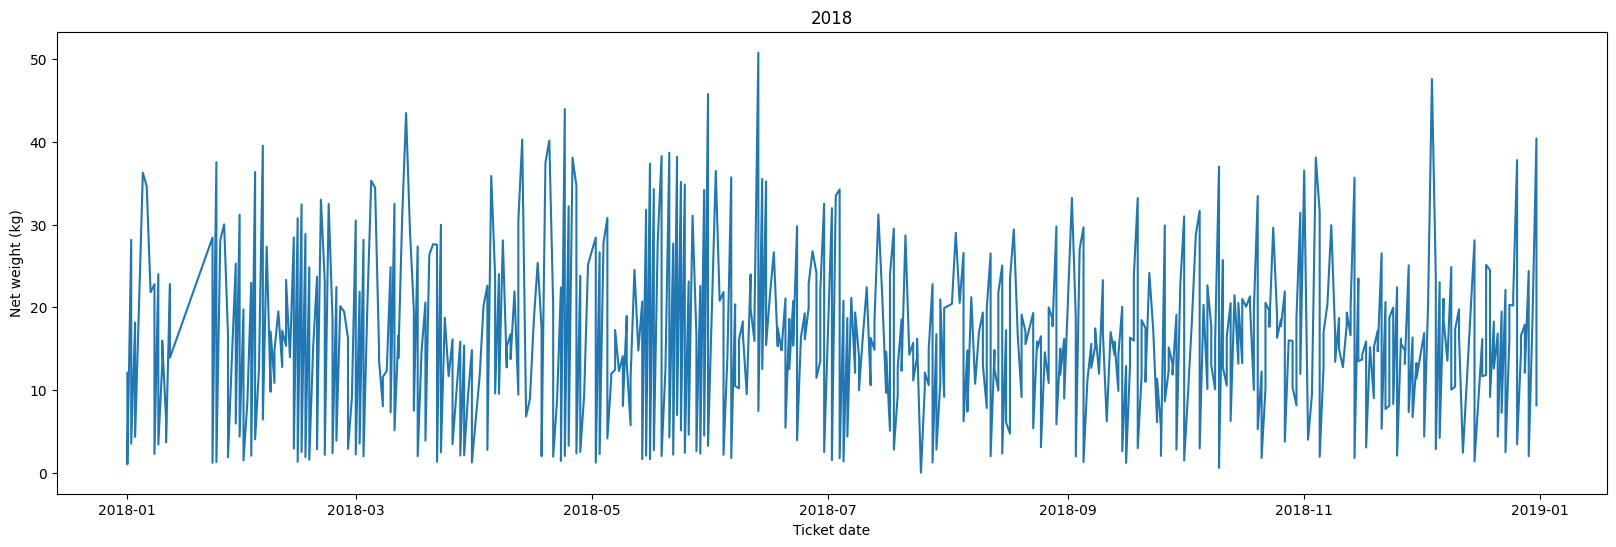

In [ ]:
#GRAFIK PLOT NET WEIGHT TERHADAP TANGGAL SETIAP TAHUN
data['ticket_date'] = pd.to_datetime(data['ticket_date'])
for year in range(2012, 2019):
    x = data[data['ticket_date'].dt.year == year]['ticket_date'].tolist()
    y = data[data['ticket_date'].dt.year == year]['net_weight_kg'].tolist()

    plt.rcParams['figure.dpi'] = 100
    plt.rcParams["figure.figsize"] = (20, 6)

    plt.plot(x, y)
    plt.title('{}'.format(year))
    plt.xlabel('Ticket date')
    plt.ylabel('Net weight (kg)')
    plt.show()

In [ ]:
data = data.drop(['area', 'waste_type'], axis=1)
# Dataset setelah menghapus kolom 'area' dan 'waste_type'
print(data)

     ticket_date  net_weight_kg
0     2012-01-01        17340.0
1     2012-01-02        25980.0
2     2012-01-03        29220.0
3     2012-01-04         7450.0
4     2012-01-05        10520.0
...          ...            ...
2983  2018-12-29        24390.0
2984  2018-12-29         1990.0
2985  2018-12-30        18960.0
2986  2018-12-31        40420.0
2987  2018-12-31         8150.0

[2988 rows x 2 columns]


In [ ]:
#ubah volume sampah menjadi ton
data['net_weight_kg'] = data['net_weight_kg']/1000
print(data)

     ticket_date  net_weight_kg
0     2012-01-01          17.34
1     2012-01-02          25.98
2     2012-01-03          29.22
3     2012-01-04           7.45
4     2012-01-05          10.52
...          ...            ...
2983  2018-12-29          24.39
2984  2018-12-29           1.99
2985  2018-12-30          18.96
2986  2018-12-31          40.42
2987  2018-12-31           8.15

[2988 rows x 2 columns]


##PENANGANAN OUTLIER MENGGUNAKAN Z-SCORE

In [ ]:
df = pd.DataFrame(data)

# Menghitung Z-Score
z_scores = (df['net_weight_kg'] - df['net_weight_kg'].mean()) / df['net_weight_kg'].std()

# Menentukan batas Z-Score untuk mendeteksi outlier
threshold = 3

# Mengidentifikasi dan mengatasi outlier
outliers = np.abs(z_scores) > threshold
data_1 = df[~outliers]

# Menampilkan hasil
print("Dataset Asli:")
print(df)
print("\nDataset Tanpa Outlier:")
print(data_1)

Dataset Asli:
     ticket_date  net_weight_kg
0     2012-01-01          17.34
1     2012-01-02          25.98
2     2012-01-03          29.22
3     2012-01-04           7.45
4     2012-01-05          10.52
...          ...            ...
2983  2018-12-29          24.39
2984  2018-12-29           1.99
2985  2018-12-30          18.96
2986  2018-12-31          40.42
2987  2018-12-31           8.15

[2988 rows x 2 columns]

Dataset Tanpa Outlier:
     ticket_date  net_weight_kg
0     2012-01-01          17.34
1     2012-01-02          25.98
2     2012-01-03          29.22
3     2012-01-04           7.45
4     2012-01-05          10.52
...          ...            ...
2983  2018-12-29          24.39
2984  2018-12-29           1.99
2985  2018-12-30          18.96
2986  2018-12-31          40.42
2987  2018-12-31           8.15

[2983 rows x 2 columns]


In [ ]:
#Visualisasi Data Sampah Perhari setelah penanganan outlier
fig = px.line(data_1, x="ticket_date", y="net_weight_kg", height=600,labels={'Netto (kg)':'Volume Sampah(ton)'})
fig.update_layout(title_text='Volume Sampah Harian Boralesgamuwa',
                plot_bgcolor='white', font_size=15, font_color='black')
fig.show()

In [ ]:
#Normalisasi Data
from sklearn.preprocessing import MinMaxScaler
close_stock = data_1.copy()
del data_1['ticket_date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(data_1).reshape(-1,1))
print(closedf.shape)

(2983, 1)


In [ ]:
#Cek Data Normalisasi
datanormalisasi= pd.DataFrame(closedf)
datanormalisasi.head(20)

,0
0,0.302407
1,0.453087
2,0.509592
3,0.129927
4,0.183467
5,0.510290
6,0.206139
7,0.360656
8,0.417510
9,0.406871


In [ ]:
#Sliding Window
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----29 30
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 30

In [ ]:
#split Data training 80% dan data test 20%
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]

In [ ]:
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Create Model Backpropagation
model = Sequential()
model.add(Dense(7, input_dim=time_step, kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))  # Hidden layer dengan 16 neuron dan aktivasi ReLU
model.add(Dense(1,activation='relu', kernel_initializer='normal'))

In [ ]:
# Training dan Compiling dengan algoritma delta bar delta
from keras.optimizers import Adadelta
#menggunakan parameter learning rate= 0.01
opt = Adadelta(learning_rate=0.09)
model.compile(optimizer=opt, loss='mse')
#Di Keras, algoritma backpropagation tidak secara eksplisit ditulis sebagai fungsi atau metode terpisah. Sebaliknya, sudah diimplementasikan sebagai bagian dari proses pelatihan saat kita menggunakan method model.fit()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,batch_size=64)

Epoch 1/1000
37/37 [==============================] - 1s 6ms/step - loss: 0.0201 - val_loss: 0.0463
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0463
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0462
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0462
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0462
Epoch 6/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0461
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0462
Epoch 8/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0462
Epoch 9/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0461
Epoch 10/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0462

In [ ]:
#Hasil Prediksi Dari Model
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

18/18 [==============================] - 0s 2ms/step


((2355, 1), (566, 1))

In [ ]:
#Denormalisasi Data

train_predict_original = scaler.inverse_transform(train_predict)
test_predict_original = scaler.inverse_transform(test_predict)

In [ ]:
#, Data train Prediksi

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict_original
print("Train predicted data: ", trainPredictPlot.shape)

# Plotting Data Test Prediksi
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict_original
print("Test predicted data: ", testPredictPlot.shape)


#Buat Dataframe Dari Hasil Prediksi Dan Data Aktual
plotdf = pd.DataFrame({'date': close_stock['ticket_date'],
                       'original_close': close_stock['net_weight_kg'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

#Visualisasi Data Dengan Plotly
names = cycle(['Data Aktual','Train predicted Volume','Test predicted Volume'])
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Volume Sampah(ton)','date': 'ticket_date'})
fig.update_layout(title_text='Plot Data Aktual dan Data Prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Keterangan')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2983, 1)
Test predicted data:  (2983, 1)


In [ ]:
#prediksi Volume Sampah Hari berikutnya
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i = 0
pred_days = 30
while i < pred_days:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        print(temp_input)

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i += 1


print("Output of predicted next days: ", len(lst_output))
#######

last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

#########

temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1)[0].tolist()
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output)).reshape(1,-1)[0].tolist()

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

1 day input [0.2816533  0.20334845 0.20613882 0.43826299 0.4274503  0.15974887
 0.31862574 0.21974189 0.29351238 0.07586327 0.33972794 0.12626439
 0.3855947  0.04307639 0.27938612 0.3540286  0.35245902 0.37286362
 0.65922567 0.05999302 0.25322637 0.28897803 0.312173   0.21067318
 0.42535752 0.03470527 0.33065923 0.70491803 0.14213464 0.65749907]
1 day output [[0.5593997]]
[0.2816532961283571, 0.20334844785490055, 0.20613882106731773, 0.43826299267527025, 0.42745029647715377, 0.15974886641088243, 0.3186257411928845, 0.21974189047785136, 0.29351238228113, 0.07586327171259154, 0.3397279386117893, 0.12626438786187652, 0.3855946982908963, 0.04307638646668992, 0.27938611789326817, 0.35402860132542724, 0.35245901639344257, 0.37286362050924304, 0.6592256714335542, 0.05999302406696895, 0.2532263690268573, 0.28897802581095217, 0.3121730031391698, 0.21067317753749562, 0.4253575165678409, 0.03470526682943843, 0.3306592256714335, 0.7049180327868851, 0.1421346355074991, 0.6574990749359131, 0.5593997

In [ ]:

#Visualisasi Hasil Prediksi 30 hari dengan Plotly
prediksi = new_pred_plot.iloc[31:].reset_index()
prediksi = prediksi.drop(['index','last_original_days_value'], axis=1)
tanggal = pd.date_range(start='2023-01-01',periods = pred_days)
prediksi['tanggal'] = tanggal
fig = px.bar(prediksi, x='tanggal', y='next_predicted_days_value',
              color='next_predicted_days_value',
             labels={'next_predicted_days_value':'Volume Sampah perhari(ton)'}, height=600)
fig.update_layout(title_text='Prediksi Volume Sampah Pada Bulan Januari 2023',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.show()

In [ ]:
prediksi

,next_predicted_days_value,tanggal
0,37.700997,2023-01-01
1,32.075980,2023-01-02
2,2.461547,2023-01-03
3,25.900719,2023-01-04
4,24.954384,2023-01-05
5,1.250165,2023-01-06
6,27.776631,2023-01-07
7,23.481443,2023-01-08
8,0.000000,2023-01-09
9,21.723837,2023-01-10


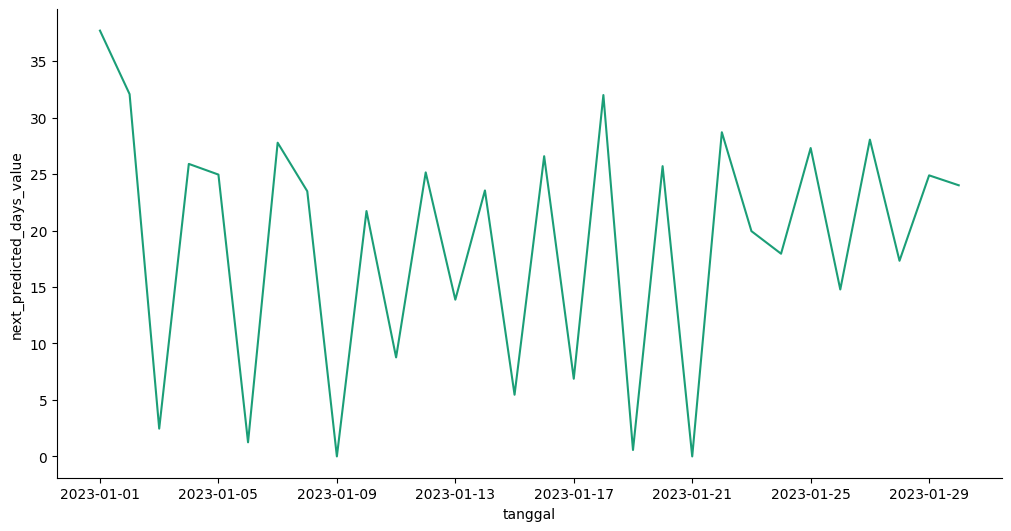

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tanggal']
  ys = series['next_predicted_days_value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = prediksi.sort_values('tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tanggal')
_ = plt.ylabel('next_predicted_days_value')